In [1]:
'''
Visualize the data generated from src/cut_and_project/three_dim_commuting.py
'''
import os
import numpy as np
import matplotlib.pyplot as plt
from aperiodic_codes import cut_and_project
data_folder = '/data/apc/penrose_p3/'
n = 2

#%matplotlib widget

In [137]:
# check commutation in 6D
hx = np.load(os.path.join(data_folder, f'hx_n={n}.npy'))
hz = np.load(os.path.join(data_folder, f'hz_n={n}.npy'))
assert hx.shape[1] == hz.shape[1]
assert np.sum(hx @ hz.T % 2) < 1e-5
#assert np.allclose(hx @ hz.T % 2, np.zeros_like(hx @ hz.T))
#assert np.allclose(hz @ hx.T % 2, np.zeros_like(hz @ hx.T))

#for i in range(hx.shape[0]):
#    assert np.sum(hx[i]) == 5, f"{np.sum(hx[i])}"

#for i in range(hz.shape[0]):
#    assert np.sum(hz[i]) == 5, f"{np.sum(hz[i])}"

Number of points: 73


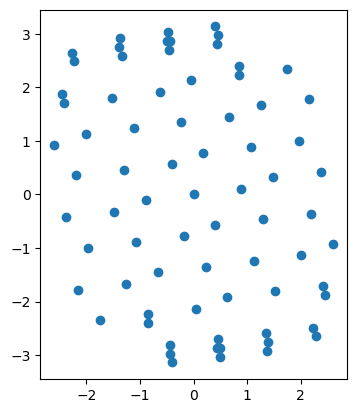

In [138]:
# visualize points in 3D
proj_pts = np.load(os.path.join(data_folder, f'proj_pts_n={n}.npy'))
n_points = proj_pts.shape[1]
print(f'Number of points: {n_points}')
fig = plt.figure()
ax = fig.add_subplot(111);#, projection='3d')
ax.set_aspect('equal', 'box')
ax.scatter(proj_pts[0, :], proj_pts[1, :]);#, proj_pts[2, :])
plt.show()

In [139]:
# check anti-commutation between X and Z checks
new_hx_cc = np.load(os.path.join(data_folder, f'new_hx_cc_n={n}.npy'))
new_hx_vv = np.load(os.path.join(data_folder, f'new_hx_vv_n={n}.npy'))
new_hz_cc = np.load(os.path.join(data_folder, f'new_hz_cc_n={n}.npy'))
new_hz_vv = np.load(os.path.join(data_folder, f'new_hz_vv_n={n}.npy'))

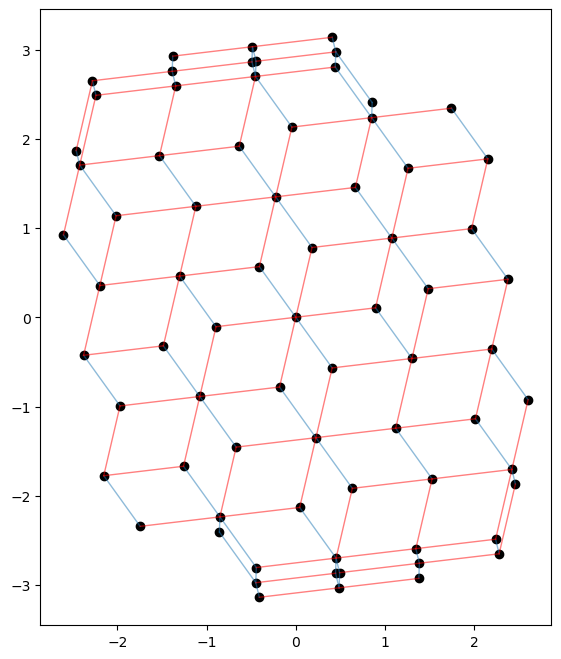

In [140]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111);#, projection='3d')
ax.set_aspect('equal', 'box')
for i in range(new_hx_cc.shape[0]):
    for j in range(new_hx_cc.shape[1]):
        if new_hx_cc[i,j] != 0:
            ax.plot([proj_pts[0,i],proj_pts[0,j]],[proj_pts[1,i],proj_pts[1,j]],ls='-',lw=1,color='C0',alpha=0.5);
for i in range(new_hz_cc.shape[0]):
    for j in range(new_hz_cc.shape[1]):
        if new_hz_cc[i,j] != 0:
            ax.plot([proj_pts[0,i],proj_pts[0,j]],[proj_pts[1,i],proj_pts[1,j]],ls='-',lw=1,color='r',alpha=0.5);
ax.scatter(proj_pts[0, :], proj_pts[1, :],color='k')
plt.show()

In [141]:
num_nonzero_stabilizers = 0
for i in range(new_hx_cc.shape[0]):
    if np.sum(new_hx_cc[i, :] + new_hx_vv[i, :]) != 0:
        num_nonzero_stabilizers += 1
        # print(f'X check {i}:')
        # print(new_hx_cc[i, :])
        # print(new_hx_vv[i, :])
        # print(np.sum(new_hx_cc[i, :] + new_hx_vv[i, :]))
    print(np.sum(new_hx_cc[i, :] + new_hx_vv[i, :]))

2
4
2
4
3
4
2
4
4
3
2
4
2
2
4
5
5
2
5
5
2
5
3
5
5
2
3
5
5
4
2
5
2
5
5
2
5
5
2
5
5
2
5
4
5
2
5
4
3
3
5
4
5
2
5
5
2
5
2
4
5
4
5
4
5
2
5
2
5
3
5
3
4


In [142]:
new_hx = np.hstack([new_hx_cc, new_hx_vv])
new_hz = np.hstack([new_hz_cc, new_hz_vv])

In [143]:
anti_comm_mat_x = (new_hx @ new_hz.T) % 2

In [144]:
print(anti_comm_mat_x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


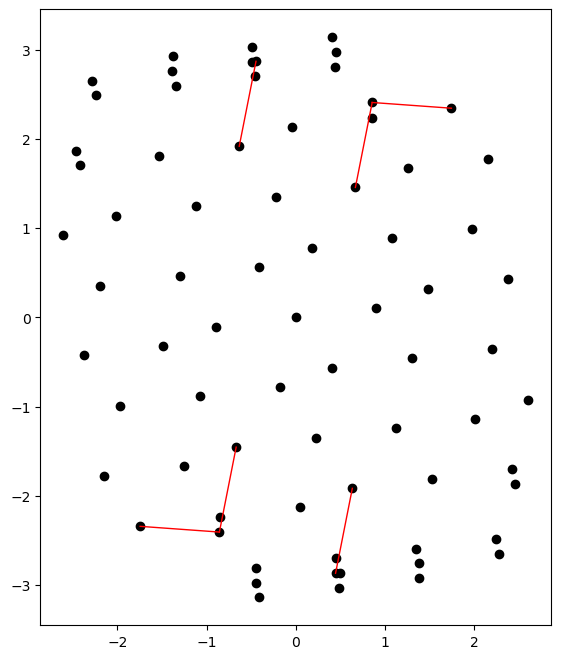

In [145]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111);#, projection='3d')
ax.set_aspect('equal', 'box')
for i in range(anti_comm_mat_x.shape[0]):
    for j in range(anti_comm_mat_x.shape[1]):
        if anti_comm_mat_x[i,j] != 0:
            ax.plot([proj_pts[0,i],proj_pts[0,j]],[proj_pts[1,i],proj_pts[1,j]],ls='-',lw=1,color='r');
ax.scatter(proj_pts[0, :], proj_pts[1, :],color='k')
plt.show()

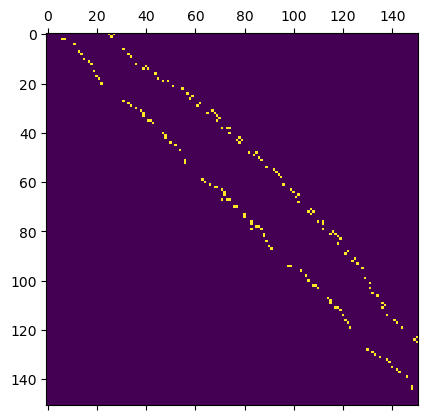

In [12]:
# visualize the anti-commutation matrix
plt.matshow(anti_comm_mat_x)

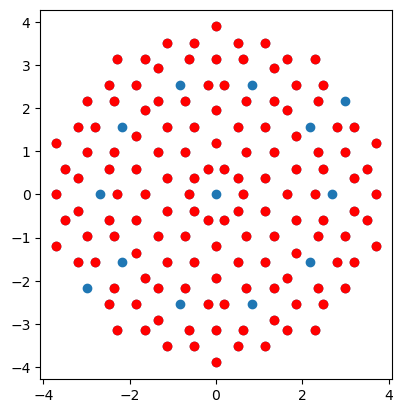

In [15]:
# visualize in 3D
# X part
fig = plt.figure()
ax = fig.add_subplot(111)#, projection='3d')
ax.set_aspect('equal', 'box')
ax.scatter(proj_pts[0, :], proj_pts[1, :])
for i in range(proj_pts.shape[1]):
    if np.sum(anti_comm_mat_x[i, :]) or np.sum(anti_comm_mat_x[:, i]):
        ax.scatter(proj_pts[0, i], proj_pts[1, i], c='r')

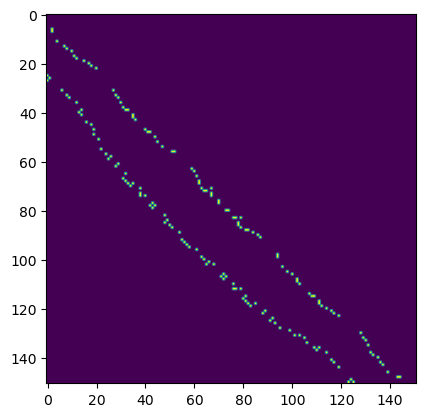

In [17]:
# Z part
fig = plt.figure()
anti_comm_mat_z = (new_hz @ new_hx.T) % 2
np.save(os.path.join(data_folder, f'anti_comm_mat_z_n={n}.txt'), anti_comm_mat_z)
plt.imshow(anti_comm_mat_z)

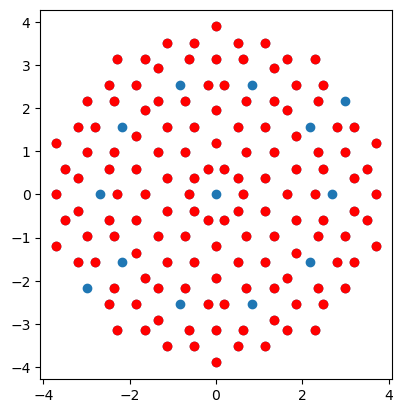

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)#, projection='3d')
ax.set_aspect('equal', 'box')
ax.scatter(proj_pts[0, :], proj_pts[1, :])
for i in range(proj_pts.shape[1]):
    if np.sum(anti_comm_mat_z[i, :]) or np.sum(anti_comm_mat_z[:, i]):
        ax.scatter(proj_pts[0, i], proj_pts[1, i], c='r')
plt.show()